In [1]:
import os
import trainer as tr
import matplotlib.pyplot as plt
import model.utils.utility as utils
from torch.utils.data import DataLoader
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

N_EPOCHS_SEGMENTATION = 10000
BATCH_SIZE = 256
TECHNIQUE = 'supervised'
P_THRESHOLD = 0.5
IoU_THRESHOLD = 0.65

In [2]:
trainer = tr.SupervisedTrainer(n_epochs_segmentation=N_EPOCHS_SEGMENTATION, technique=TECHNIQUE)
data, phase = tr.get_supervised_data(batch_size=BATCH_SIZE)
if phase == 'train':
    trainer.train_segmentation(**data)

  0%|          | 0/10000 [00:00<?, ?it/s]C:\Users\Noisecape\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


RuntimeError: CUDA out of memory. Tried to allocate 512.00 MiB (GPU 0; 8.00 GiB total capacity; 5.91 GiB already allocated; 0 bytes free; 5.96 GiB reserved in total by PyTorch)

In [3]:
model = data['model']
test_data = tr.SegmentationDataset(mode='test', split_perc=[0.6, 0.1, 0.3])
dataloader_test = DataLoader(test_data, batch_size=1, shuffle=True)
accuracy, accuracy_no_t, dice_score, sensitivity, specificity = trainer.evaluate(dataloader_test, model,
                                                                               p_threshold=0.5, T=0.65)

  0%|          | 0/809 [00:00<?, ?it/s]C:\Users\Noisecape\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
ERROR:root:Internal Python error in the inspect module.                                                                          
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Noisecape\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-fd45ec4be04c>", line 4, in <module>
    accuracy, accuracy_no_t, dice_score, sensitivity, specificity = trainer.evaluate(dataloader_test, model,
  File "C:\Users\Noisecape\PycharmProjects\skin-cancer-segmentation\trainer.py", line 315, in evaluate
    true_positives = torch.sum(torch.tensor([1.0 if p == 1.0 and g == 1.0 else 0.0
  File "C:\Users\Noisecape\PycharmProjects\skin-cancer-segmentation\trainer.py", line 315, in <listcomp>
    true_positives = torch.sum(torch.tensor([1.0 if p == 1.0 and g == 1.0 else 0.0
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Noisecape\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = val

TypeError: object of type 'NoneType' has no len()

In [4]:
print(f'Thresholded_IoU {accuracy:.2f}')
print(f'IoU {accuracy_no_t:.2f}')
print(f'Dice Score {dice_score:.2f}')
print(f'Precision {sensitivity:.2f}')
print(f'Recall {specificity:.2f}')

Thresholded_IoU 0.52
IoU 0.66
Dice Score 0.76
Precision 0.86
Recall 0.94


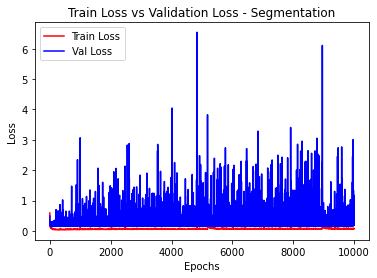

In [3]:
def plot_train_val_history(epoch, loss_history, val_history, title):
    plt.plot([el for el in range(epoch)], loss_history[:epoch], 'r', label='Train Loss')
    plt.plot([el for el in range(epoch)], val_history[:epoch], 'b', label='Val Loss')
    plt.title(f'Train Loss vs Validation Loss - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

path_segmentation = './saved_models/segmentation_checkpoint_supervised.pth'
epoch_seg, loss_history_seg, val_history_seg = utils.get_train_history(path=path_segmentation)
plot_train_val_history(epoch_seg, loss_history_seg, val_history_seg, title='Segmentation')